# Import Necessary Libraries

In [3]:
import sqlite3
import csv
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # For modern heatmap and boxplot
from IPython.display import display

# Function to Load CSV Data into SQLite

In [4]:
def load_csv_to_db(csv_file, db_name, table_name):
    conn = sqlite3.connect(db_name)
    cur = conn.cursor()

    # Create table schema
    cur.execute(f'''CREATE TABLE IF NOT EXISTS {table_name} (
                      PersonID INTEGER,
                      PersonName TEXT,
                      SchoolID TEXT,
                      SchoolName TEXT,
                      SchoolCampus TEXT,
                      DepartmentName TEXT,
                      DepartmentID TEXT,
                      BirthDate TEXT,
                      StillWorking TEXT,
                      JobID TEXT,
                      JobTitle TEXT,
                      Earnings REAL,
                      EarningsYear INTEGER
                  )''')

    # Read CSV and insert rows into the table
    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header row
        for row in reader:
            cur.execute(f'''INSERT INTO {table_name} VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)''', row)

    conn.commit()
    conn.close()

# Load CSV Data into the Database

In [5]:
# File names and table names
csv_files = ['./csv_files/salary_tracker_1MB.csv', './csv_files/salary_tracker_10MB.csv', './csv_files/salary_tracker_100MB.csv']
table_names = ['salary_data_1MB', 'salary_data_10MB', 'salary_data_100MB']
db_name = 'salary_data.db'

# Load data into the database
for csv_file, table_name in zip(csv_files, table_names):
    load_csv_to_db(csv_file, db_name, table_name)

# Function to Measure Query Performance with Dynamic Query

In [22]:
def measure_query_performance(db_name, table_name, user_query):
    conn = sqlite3.connect(db_name)
    cur = conn.cursor()

    # Dynamically insert the table name into the query
    query = user_query.format(table_name=table_name)

    # Measure query execution time
    start_time = time.time()
    cur.execute(query)
    results = cur.fetchall()
    end_time = time.time()

    # Calculate elapsed time
    elapsed_time = end_time - start_time

    # Create a DataFrame from the query results for better display
    columns = [description[0] for description in cur.description]
    df = pd.DataFrame(results, columns=columns)

    # Close the connection
    conn.close()

    # Display results
    print(f"Query executed in: {elapsed_time:.4f} seconds for table {table_name}")
    display(df)  # Display DataFrame in a formatted table

    return elapsed_time

# Measure Query Performance for Each File

In [23]:
# Get the query input from the user
user_query = input("Please enter your SQL query (use '{table_name}' as placeholder for table name):\n")

# CSV files and table names
table_names = ['salary_data_1MB', 'salary_data_10MB', 'salary_data_100MB']
db_name = 'salary_data.db'

# Measure performance for each table using the user input query
times = []
for table_name in table_names:
    time_taken = measure_query_performance(db_name, table_name, user_query)
    times.append(time_taken)

Please enter your SQL query (use '{table_name}' as placeholder for table name):
 SELECT PersonName, DepartmentName, JobTitle, Earnings  FROM {table_name}  WHERE Earnings > 150000;


Query executed in: 0.0157 seconds for table salary_data_1MB


,PersonName,DepartmentName,JobTitle,Earnings
0,Amber Solomon,Biology,Engineer,382627.0
1,Amber Solomon,Biology,Professor,356188.0
2,Amber Solomon,Biology,Professor,411771.0
3,Valerie Harvey,Computer Science,Lecturer,363920.0
4,Valerie Harvey,Computer Science,Researcher,379856.0
...,...,...,...,...
6308,Howard Neal,Biology,Analyst,413516.0
6309,Frank Olson,Biology,Analyst,281573.0
6310,Frank Olson,Biology,Coordinator,191908.0
6311,Frank Olson,Biology,Administrator,264261.0


Query executed in: 0.0910 seconds for table salary_data_10MB


,PersonName,DepartmentName,JobTitle,Earnings
0,Charles Poole,Biology,Engineer,360424.0
1,Charles Poole,Biology,Scientist,378389.0
2,Charles Poole,Biology,Analyst,373973.0
3,Charles Poole,Biology,Lecturer,421817.0
4,Charles Poole,Biology,Engineer,367042.0
...,...,...,...,...
56604,Jeremy Cobb,Computer Engineering,Professor,202418.0
56605,Jeremy Cobb,Computer Engineering,Professor,213812.0
56606,Jeremy Cobb,Computer Engineering,Engineer,291040.0
56607,Tara Oneal,Civil Engineering,Lecturer,263609.0


Query executed in: 0.8815 seconds for table salary_data_100MB


,PersonName,DepartmentName,JobTitle,Earnings
0,Stanley Keller,Physics,Professor,220412.0
1,Christopher Barajas,Physics,Researcher,225699.0
2,Christopher Barajas,Physics,Researcher,181629.0
3,Christopher Barajas,Physics,Professor,425841.0
4,Christopher Barajas,Physics,Analyst,171747.0
...,...,...,...,...
565283,Michael Kemp,Physics,Researcher,407484.0
565284,Michael Kemp,Physics,Administrator,360110.0
565285,Michael Kemp,Physics,Coordinator,330211.0
565286,Michael Kemp,Physics,Scientist,211929.0


# Plot Individual Graphs for Each File Size

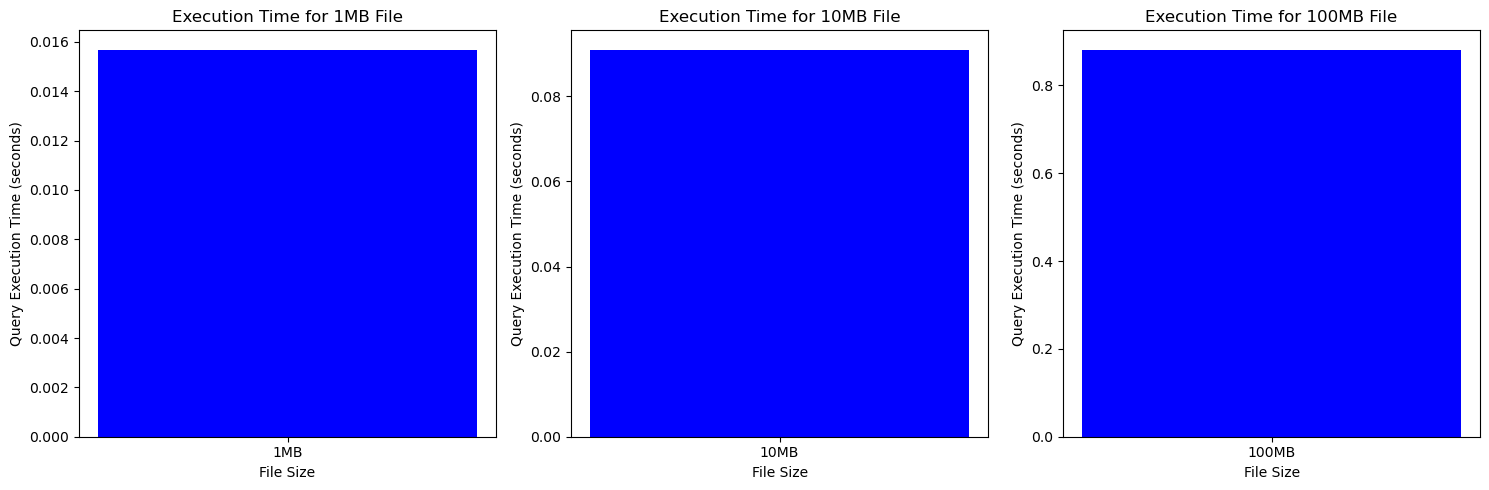

In [28]:
# File sizes for the plot
file_sizes = ['1MB', '10MB', '100MB']

# Plot individual bar graphs for each file
plt.figure(figsize=(15, 5))

for i, (file_size, time_taken) in enumerate(zip(file_sizes, times)):
    plt.subplot(1, 3, i+1)
    plt.bar(file_size, time_taken, color='b')
    plt.xlabel('File Size')
    plt.ylabel('Query Execution Time (seconds)')
    plt.title(f'Execution Time for {file_size} File')

plt.tight_layout()
plt.show()


# Modern Comparison Plot with Multiple Graph Types

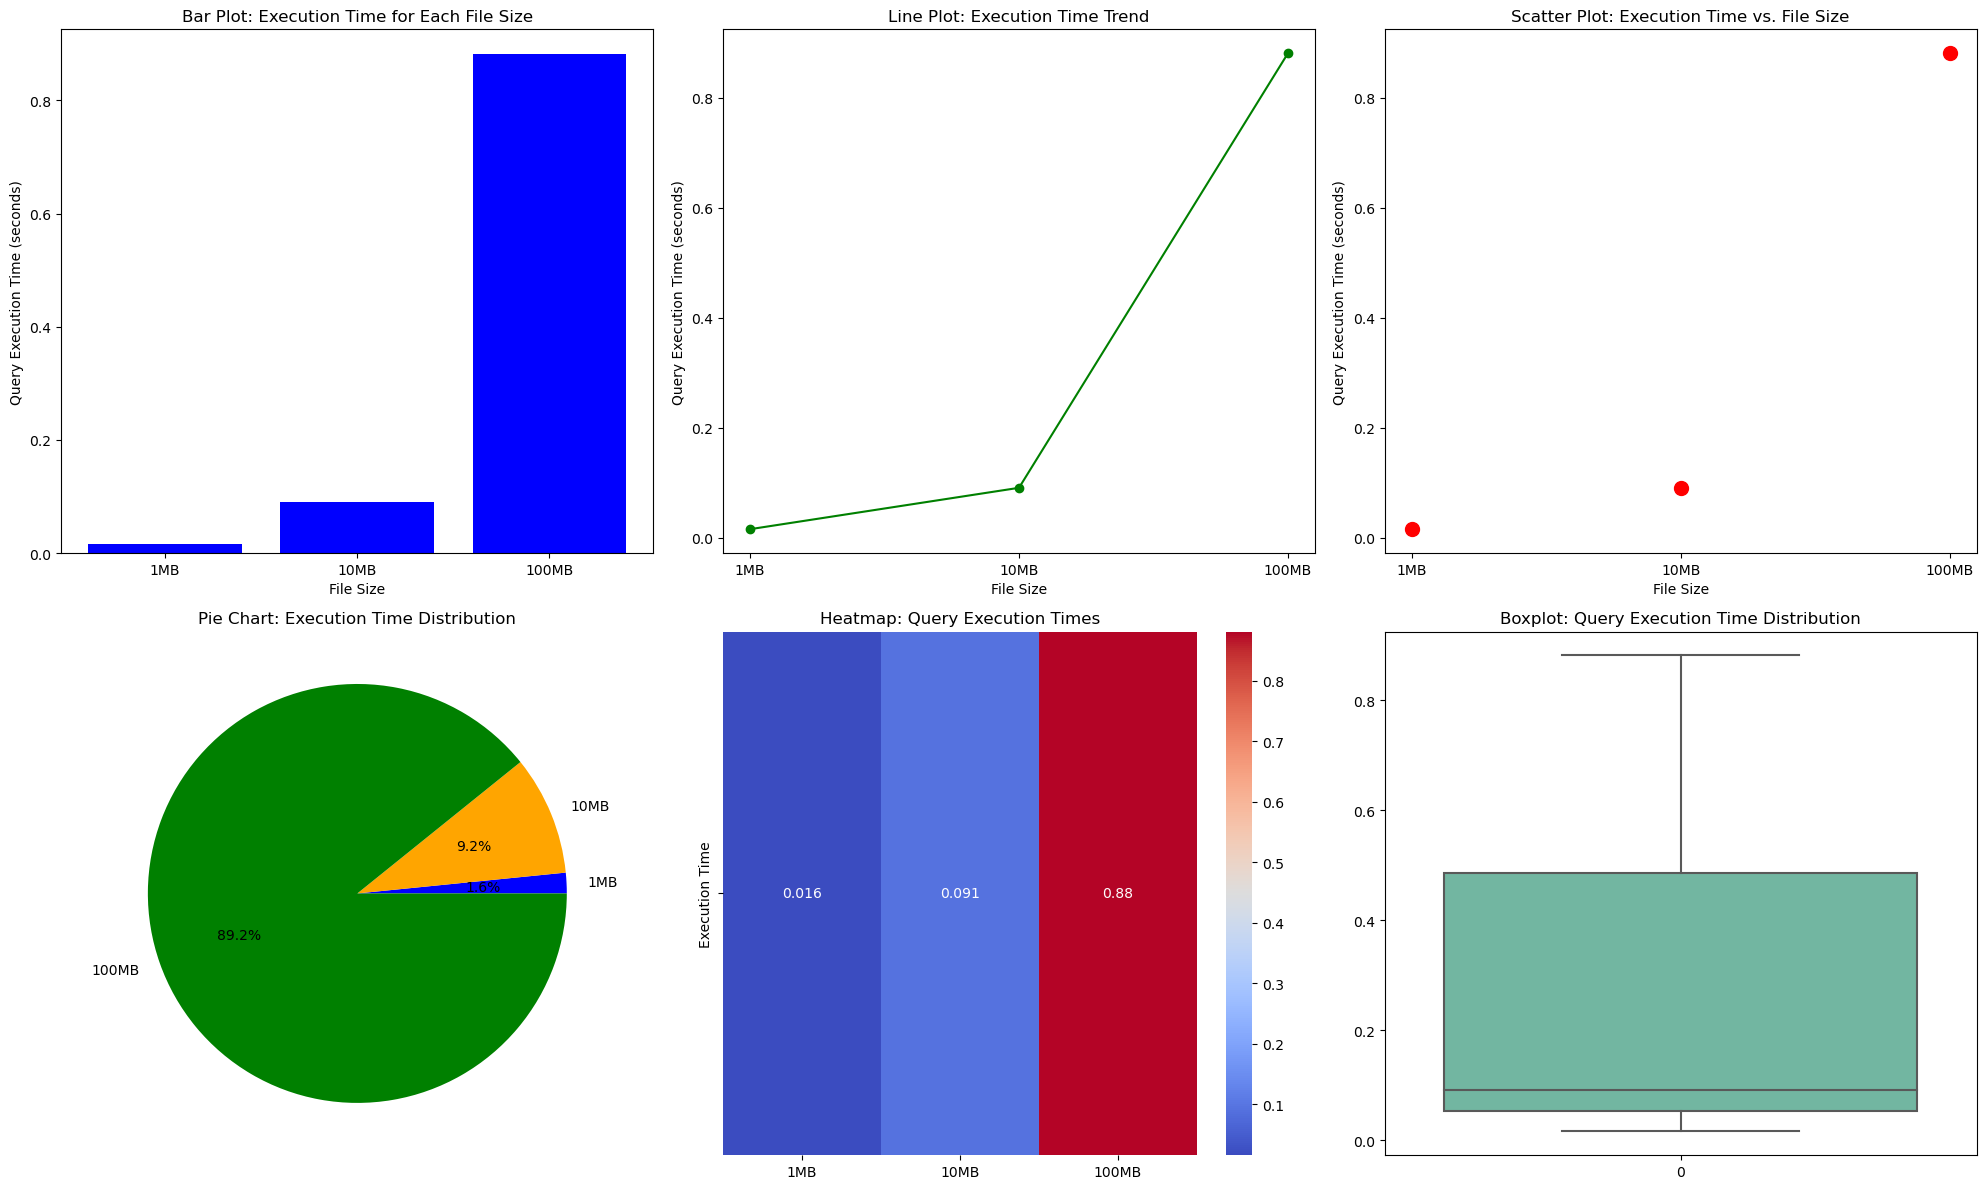

In [29]:
# Modern comparison plot for query execution times
plt.figure(figsize=(20, 12))

# Bar Plot
plt.subplot(2, 3, 1)
plt.bar(file_sizes, times, color='b')
plt.xlabel('File Size')
plt.ylabel('Query Execution Time (seconds)')
plt.title('Bar Plot: Execution Time for Each File Size')

# Line Plot
plt.subplot(2, 3, 2)
plt.plot(file_sizes, times, marker='o', linestyle='-', color='g')
plt.xlabel('File Size')
plt.ylabel('Query Execution Time (seconds)')
plt.title('Line Plot: Execution Time Trend')

# Scatter Plot
plt.subplot(2, 3, 3)
plt.scatter(file_sizes, times, color='r', s=100)
plt.xlabel('File Size')
plt.ylabel('Query Execution Time (seconds)')
plt.title('Scatter Plot: Execution Time vs. File Size')

# Pie Chart
plt.subplot(2, 3, 4)
plt.pie(times, labels=file_sizes, autopct='%1.1f%%', colors=['blue', 'orange', 'green'])
plt.title('Pie Chart: Execution Time Distribution')

# Heatmap
plt.subplot(2, 3, 5)
sns.heatmap([times], annot=True, cmap='coolwarm', xticklabels=file_sizes, yticklabels=['Execution Time'])
plt.title('Heatmap: Query Execution Times')

# Boxplot
plt.subplot(2, 3, 6)
sns.boxplot(data=times, palette='Set2')
plt.title('Boxplot: Query Execution Time Distribution')

plt.tight_layout()
plt.show()